# How to build a Deep Learning model in 10 lines
### A Guide to quickly immerse yourself in Deep Learning

## 1. Cargar y preprocesar datos

In [0]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

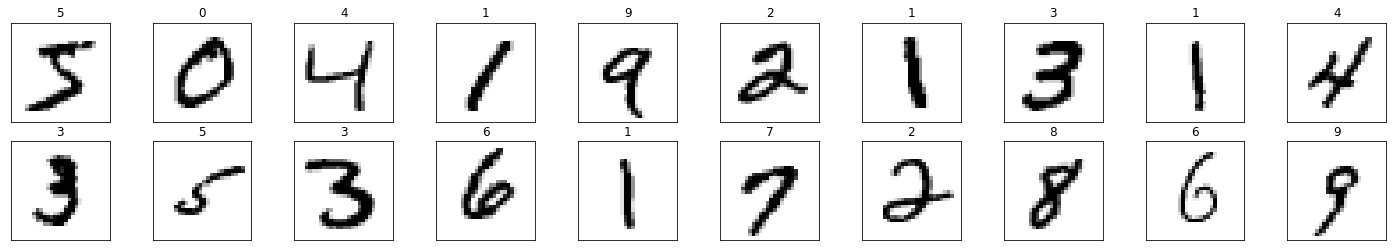

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(x_train[idx], cmap=plt.cm.binary)
   ax.set_title(str(y_train[idx]))

In [0]:
x_train = x_train.reshape(60000, 784).astype('float32')/255

In [0]:
y_train = to_categorical(y_train, num_classes=10)

## 2. Define the model

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

## 3. Train the model

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0)

## Using the model

In [0]:
_, (x_test_, y_test_)= tf.keras.datasets.mnist.load_data()
x_test = x_test_.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test_, num_classes=10)

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8934


In [10]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8934000134468079


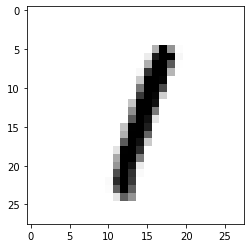

In [11]:
image = 5
_ = plt.imshow(x_test_[image], cmap=plt.cm.binary)

In [12]:
import numpy as np

prediction = model.predict(x_test)
print("Model prediction: ", np.argmax(prediction[image]))

Model prediction:  1
